# Decision Trees and Random Forests

Dataset: [Heart Disease Dataset](https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset)

## Objective
Implement and compare Decision Tree and Random Forest classifiers using scikit-learn.

In [8]:
# Step 0: Setup & Data Loading
import pandas as pd
df = pd.read_csv("heart.csv")  # Ensure the dataset is in the same directory
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [9]:
# Step 1: Preprocessing
print(df.isnull().sum())

X = df.drop("target", axis=1)
y = df["target"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


Decision Tree Accuracy: 0.9853658536585366


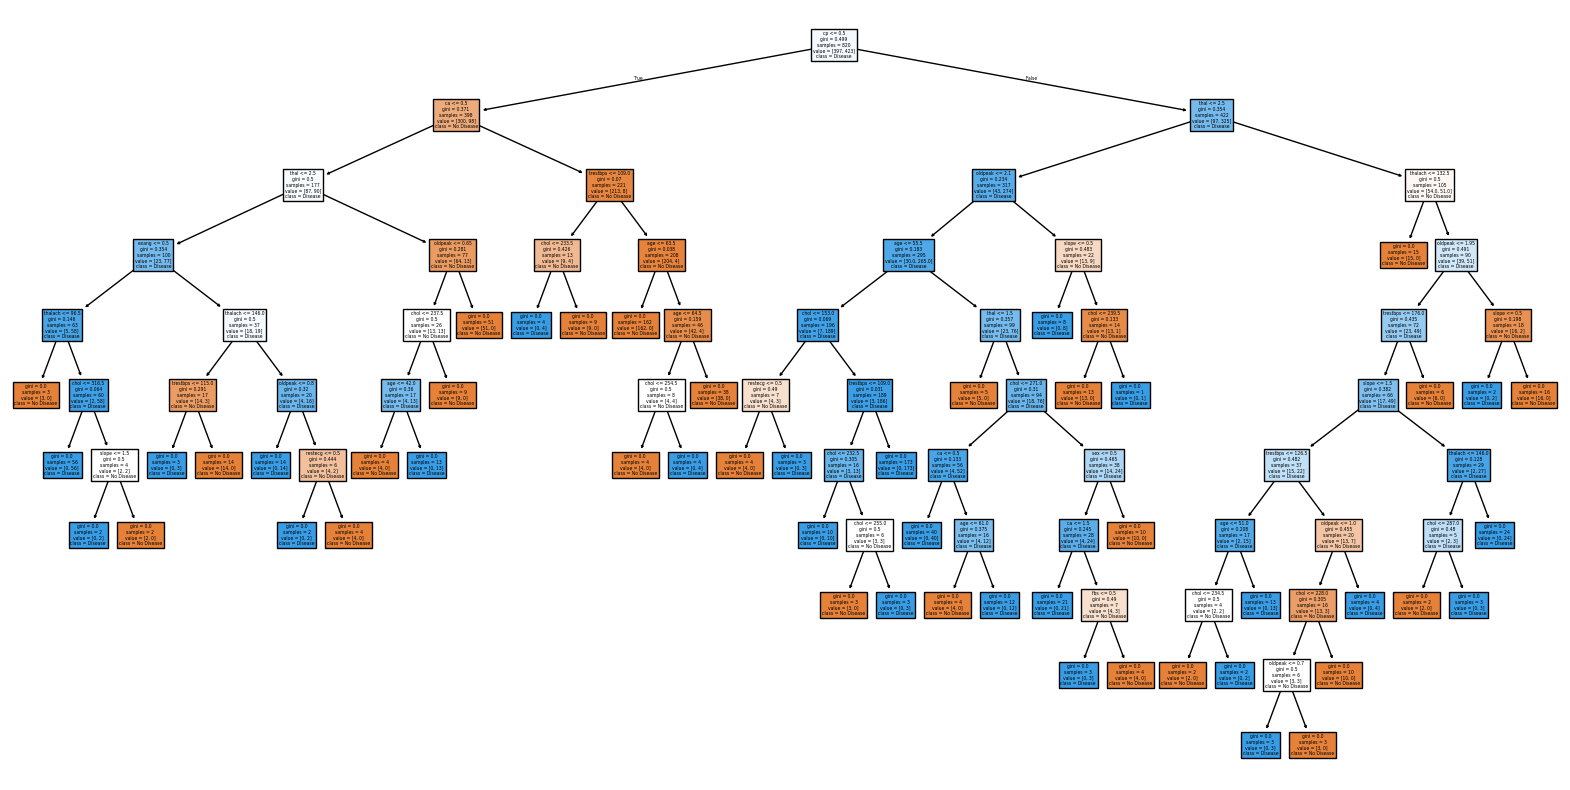

In [10]:
# Step 2: Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred))

plt.figure(figsize=(20,10))
plot_tree(dt, filled=True, feature_names=X.columns, class_names=['No Disease', 'Disease'])
plt.show()

In [11]:
# Step 3: Analyze Overfitting
dt_small = DecisionTreeClassifier(max_depth=3, random_state=42)
dt_small.fit(X_train, y_train)

y_pred_small = dt_small.predict(X_test)
print("Pruned Decision Tree Accuracy:", accuracy_score(y_test, y_pred_small))

Pruned Decision Tree Accuracy: 0.7804878048780488


In [12]:
# Step 4: Random Forest
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))

Random Forest Accuracy: 0.9853658536585366


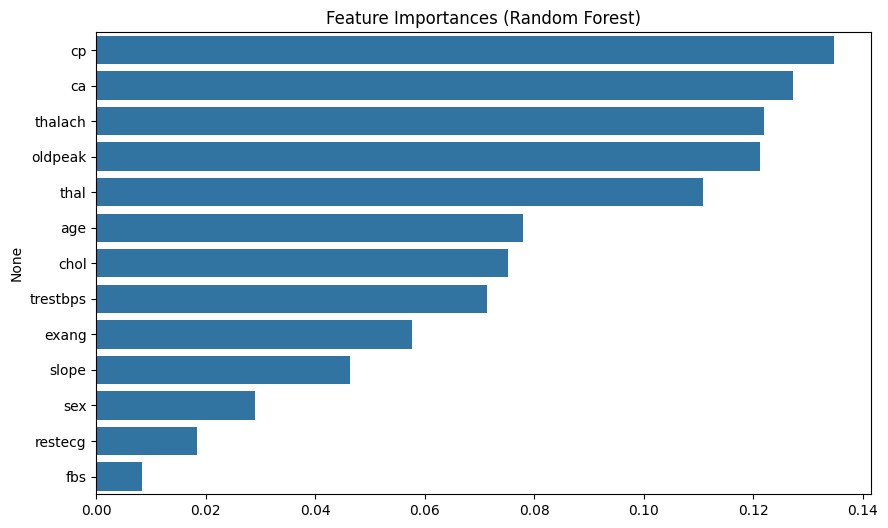

In [13]:
# Step 5: Feature Importances
import seaborn as sns
import numpy as np

importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,6))
sns.barplot(x=importances[indices], y=X.columns[indices])
plt.title("Feature Importances (Random Forest)")
plt.show()

In [14]:
# Step 6: Cross-Validation
from sklearn.model_selection import cross_val_score

dt_scores = cross_val_score(dt, X, y, cv=5)
print("Decision Tree CV Accuracy:", dt_scores.mean())

rf_scores = cross_val_score(rf, X, y, cv=5)
print("Random Forest CV Accuracy:", rf_scores.mean())

Decision Tree CV Accuracy: 1.0
Random Forest CV Accuracy: 0.9970731707317073


In [15]:
# Summary: Comparing Models

summary_data = {
    "Model": ["Decision Tree", "Decision Tree (Pruned)", "Random Forest"],
    "Test Accuracy": [
        accuracy_score(y_test, y_pred),           # Decision Tree
        accuracy_score(y_test, y_pred_small),     # Pruned Decision Tree
        accuracy_score(y_test, y_pred_rf)         # Random Forest
    ],
    "CV Accuracy": [
        dt_scores.mean(),                         # Decision Tree
        cross_val_score(dt_small, X, y, cv=5).mean(),  # Pruned Decision Tree
        rf_scores.mean()                          # Random Forest
    ],
    "Notes": [
        "Overfits easily",
        "Less overfitting",
        "Best generalization"
    ]
}

summary_df = pd.DataFrame(summary_data)
summary_df.style.set_caption("Model Performance Summary").format({
    "Test Accuracy": "{:.2%}",
    "CV Accuracy": "{:.2%}"
})

,Model,Test Accuracy,CV Accuracy,Notes
0,Decision Tree,98.54%,100.00%,Overfits easily
1,Decision Tree (Pruned),78.05%,83.02%,Less overfitting
2,Random Forest,98.54%,99.71%,Best generalization
